# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 2. Классификация изображений. Сверточные нейронные сети.

### Общая информация

Дата выдачи: 07.11.2021

Мягкий дедлайн: 23:59MSK 28.11.2021

Жесткий дедлайн: 23:59MSK 02.12.2021

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать перед самым жестким дедлайном, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=0).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

## Задание 1. (Максимум 10 баллов + 5 бонусных баллов)

__Необходимо выполнить любое из двух заданий (на выбор)__

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров). Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 45 минут обучения.
 
Good luck & have fun! :)

In [2]:
import os
import numpy as np
import random
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torchvision.io import read_image
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2021-12-05 09:21:29--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2021-12-05 09:21:29--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc78e624ae664b4223ba68019efa.dl.dropboxusercontent.com/cd/0/get/BbRljVBaBozk-gJy10F2sDP15-ojd6zq0qffL-D7nc8uVYWaGbgdu2xeGeIAiqvV_PQft7jOAr1caawlKrfmNtWpbXmlpm1CeB0YR1MbdohVyeiFHwrHEOHqtfeIkbwyTZ_7CwHm8zRINTUEe0CHclio/file?dl=1# [following]
--2021-12-05 09:21:30--  https://uc78e624ae664b4223ba68019efa.dl.dropboxusercontent.com/cd/0/get/BbRljVBaBozk-gJy10F2sDP15-ojd6zq0qffL-D7nc8uVYWaGbgdu2xeGeIAiqvV_PQft7jOAr1caawlKrfmNtWpbXm

### Подготовка данных

In [4]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        if data_dir[-3:] == "val":
            self.istrain = False
        else:
            self.istrain = True

        self.data_dir = data_dir
        self.transform = transform
    
    def __getitem__(self, idx):
        if self.istrain == True:
            dir_num, img_num = idx // 500, idx % 500
            dir_name = "class_" + '{0:03}'.format(dir_num)
            img_name = '{0:05}'.format(img_num) + ".jpg"
            img_path = os.path.join(self.data_dir, dir_name + "/" + img_name)
            img = read_image(img_path)
        else:
            dir_num, img_num = idx // 50, idx % 50
            dir_name = "class_" + '{0:03}'.format(dir_num)
            img_name = '{0:05}'.format(img_num) + ".jpg"
            img_path = os.path.join(self.data_dir, dir_name + "/" + img_name)
            img = read_image(img_path)
        
        img = img.float()

        if img.shape[0] != 3:
            img = img.repeat(3, 1, 1)

        label = dir_num
        if self.transform:
            img = self.transform(img)
        return img, dir_num

    
    def __len__(self):
        if self.istrain == True:
            return 200 * 500
        else:
            return 200 * 50

In [5]:
train_transform = transforms.Compose([                                   
            transforms.RandomCrop(64, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
val_transform = transforms.Compose([
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


train_dataset = MyDataset("./dataset/dataset/train", transform=train_transform)
val_dataset = MyDataset("./dataset/dataset/val", transform=val_transform)


train_dataloader = DataLoader(
    train_dataset,
    batch_size = 256,
    shuffle = True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size = 256,
    shuffle = True
)

best_accuracy = 0

In [6]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Вспомогательные функции, реализация модели

In [7]:
def plot_losses(train_losses, val_losses):
    clear_output()
    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    axs.plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs.plot(range(1, len(val_losses) + 1), val_losses, label='test')
    axs.set_ylabel('loss')

    axs.grid()
    axs.set_xlabel('epoch')
    axs.legend()

    plt.show()


def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    model.train()
    
    all_losses = 0.0

    for batch, (images, labels) in enumerate(tqdm(train_dataloader)):
        images  = images.to(device)
        labels = labels.to(device)

        prediction = model(images)
        loss = criterion(prediction, labels)
        all_losses += loss.item() * images.shape[0]
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses = all_losses / len(train_dataloader.dataset)

    return losses


def predict(model, val_dataloder, criterion, device="cuda:0"):
    model.eval()
    
    all_losses = 0.0
    predicted_classes = []
    true_classes = []

    for batch, (images, labels) in enumerate(tqdm(val_dataloader)):
        images  = images.to(device)
        labels = labels.to(device)
        true_classes += labels.data.cpu()

        with torch.no_grad():
            prediction = model(images)
            predicted_classes += torch.max(prediction.data, 1)[1].cpu()
            loss = criterion(prediction, labels)

            all_losses += loss.item() * images.shape[0]
    losses = all_losses / len(val_dataloader.dataset)
    return losses, predicted_classes, true_classes


def train(model, train_dataloader, val_dataloader, best_acc, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    #model.to(device)

    train_loss = []
    val_loss = []
    accuracy = []

    for epoch in range(n_epochs):
        train_loss += [train_one_epoch(model, train_dataloader, criterion, optimizer, device)]
        loss, predicted_class, true_class = predict(model, val_dataloader, criterion, device)
        val_loss += [loss]
        accuracy += [accuracy_score(predicted_class, true_class)]
        
        if scheduler:
          scheduler.step()

        plot_losses(train_loss, val_loss)

        print('Loss of train:', train_loss[-1])
        print('Loss of validation:', val_loss[-1])
        print('Accuracy:', accuracy[-1])
        best_accuracy = max(accuracy)
        print("Best accuracy:", best_accuracy)
        

### Обучение модели, запуски экспериментов

In [8]:
model = nn.Sequential(
    nn.Conv2d(3, 64, 5),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(64, 128, 5),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(128, 128, 3),
    nn.BatchNorm2d(128),
    nn.ReLU(),

    nn.Conv2d(128, 256, 3),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    
    nn.Conv2d(256, 512, 4),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    nn.MaxPool2d(3, 3),

    nn.Flatten(1),
    
    nn.Linear(512 * 2 * 2, 1000),
    nn.ReLU(),
    nn.Linear(1000, 200)
)


In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9995)
n_epochs = 35
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU()
  (14): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1))
  (15): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): ReLU()
  (17): MaxPool2d

Простой тест на проверку правильности написанного кода

In [10]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print(accuracy)
print("tests passed")

  0%|          | 0/40 [00:00<?, ?it/s]

0.0054
tests passed


Запустить обучение можно в ячейке ниже.

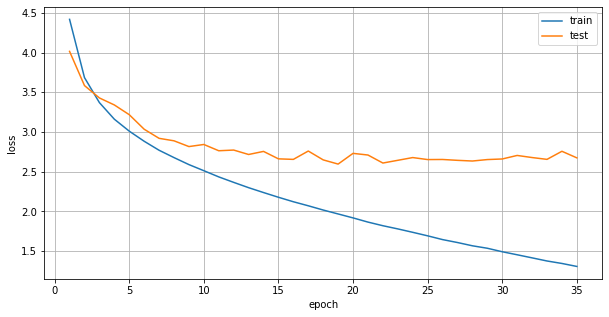

Loss of train: 1.3073572755432128
Loss of validation: 2.674372217941284
Accuracy: 0.414
Best accuracy: 0.414


In [11]:
train(model, train_dataloader, val_dataloader, 0, criterion, optimizer, device, n_epochs, scheduler)

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [12]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
# accuracy = 0.4196
print(f'Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов,'\
      f' если вы делали часть 1, и {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов,'\
      f' если вы делали часть 2.')

  0%|          | 0/40 [00:00<?, ?it/s]

Оценка за это задание составит 9.41 баллов, если вы делали часть 1, и 0.00 баллов, если вы делали часть 2.


## Задание 2 (0 баллов, но при невыполнении максимум за все задание — 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

In [ ]:
# YOUR CODE

В первой верисии я написала очень простую модель с 1 свёрточным слоем. Эта модель дала очень маленький accuracy. 

Во второй версии я сделала больше свёрточных слоев и стала подбирать lr, gamma, разные оптимизаторы. В итоге взяла не очень маленький и не очень большой lr=1e-4, который в принципе нормально делал своё дело. Выбрала в качестве оптимизатора Adam. Но всё равно accuracy был в предедлах 0.33

В последующих версиях я меняла количество слоев в моей модели и ширину слоев. В итоге потратив 1.5 дня, я создала модель, которая даёт 0.38, больше я не смогла выбить.